In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The Dataset is Telecom Customers churn Dataset,It have the details of Customer ID,Gender ,Partenership and Services they have availed like Phone,Internet,Online Security etc.,and details of their Contract period and Payment Details

In [5]:
df.shape

(7043, 21)

There are 21 Features and 7043 Attributes in the dataset


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


1.SeniorCitizen is a categorical feature but is represented as a numerical feature.
<br>
2.TotalCharges is a numerical feature but has missing values which are represented as blank spaces in the data. We will need to impute these values.
<br>
3.We will need to drop the customerID column as it is not useful for our analysis.
<br>
4.No internet service and No phone service are not different from No and can be replaced with No.

In [7]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

The Target Variable is Churn

**DATA CLEANING**

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no null values in the dataset

Categorical Features

In [9]:
categorical_features = df.select_dtypes(include=[object])
categorical_features.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**Checking For Outliers**<br>
Outliers are data points that significantly differ from the majority of the data and may adversely affect the performance of machine learning models.<br>
**Visual Inspection:**<br>
Box Plots: box plots to visualize the distribution of each numerical variable. Outliers are typically shown as points beyond the "whiskers" of the box plot.

In [11]:
numerical_features = df.select_dtypes(include=[np.number])
numerical_features.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

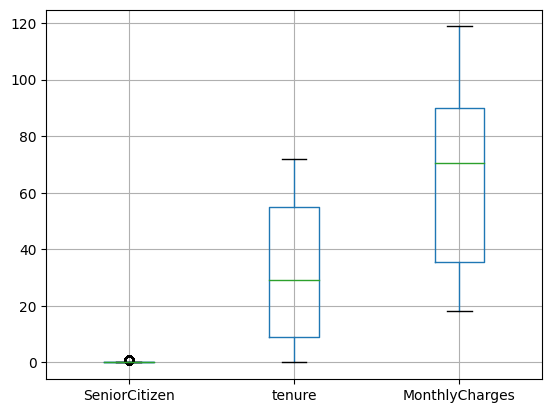

In [12]:

df.boxplot(numerical_features.columns.to_list())
plt.show()


no boxplot for categorical features-Senior Citizen as there will be no outliers

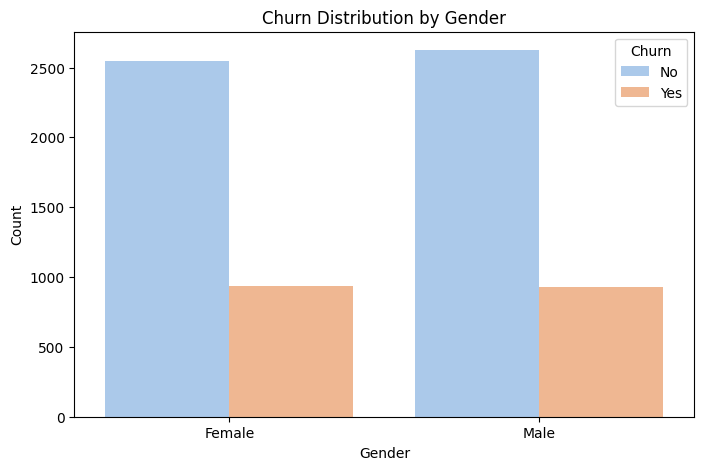

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='gender', hue='Churn', palette='pastel')
plt.title('Churn Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()


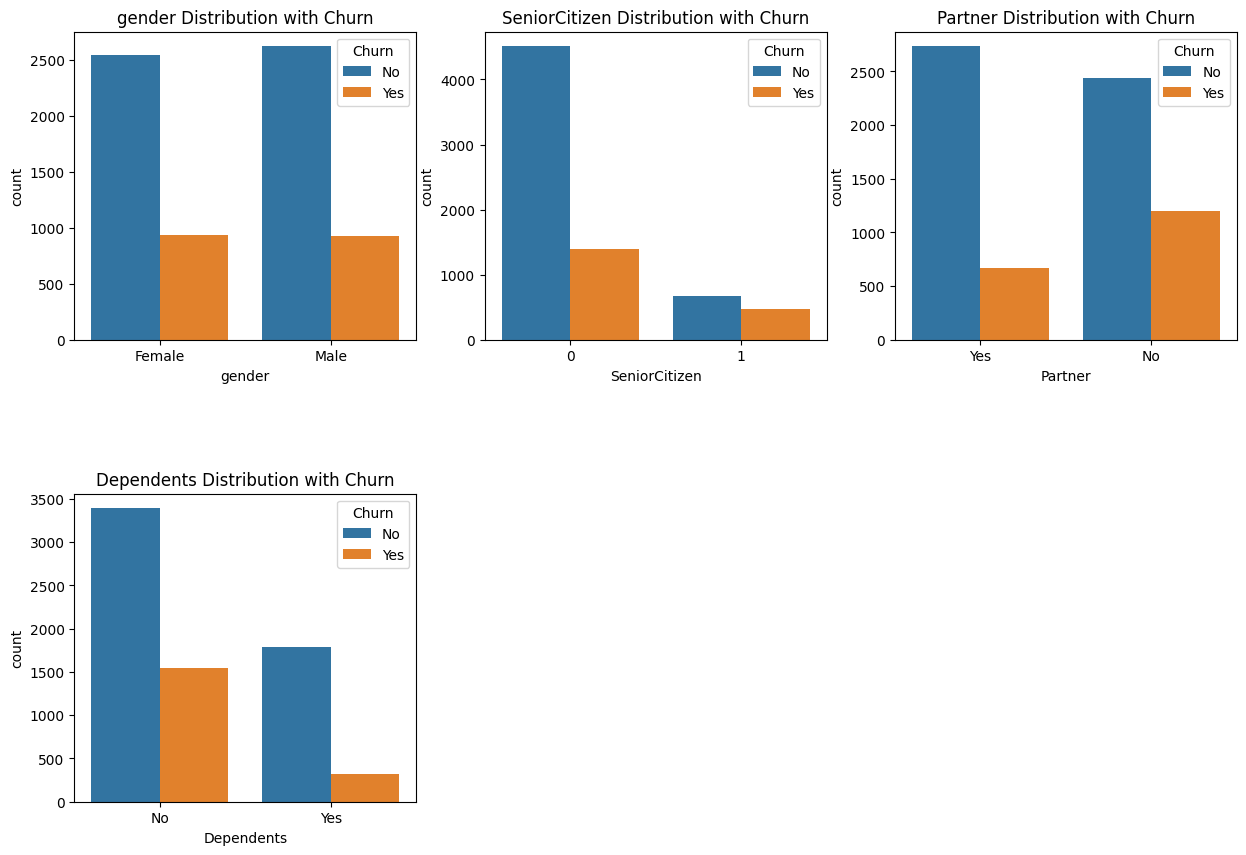

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_visualize = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

num_columns = len(columns_to_visualize)
num_rows = (num_columns - 1) // 3 + 1

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, num_rows * 5))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(columns_to_visualize):
    sns.countplot(x=column, hue='Churn', data=df, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'{column} Distribution with Churn')

# Remove any remaining empty subplots
for i in range(num_columns, num_rows * 3):
    fig.delaxes(axes.flatten()[i])

plt.show()


In [15]:
#total charges is numerical column but it is not include in numerical_features and placed in categorical_features
print(df['TotalCharges'].dtypes)
print(df['TotalCharges'].str.contains(r'[0-9]').value_counts())
#to check for the presence of numeric digits ,there are 11 non numerical data in total charges column
# Find indices where 'TotalCharges' does not contain numeric digits
idx = df[df['TotalCharges'].str.contains(r'[0-9]') == False].index
print(idx)

object
True     7032
False      11
Name: TotalCharges, dtype: int64
Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')


Handle missing values and outliers. (Cleaning) <br>
Impute missing values in TotalCharges column. (Imputation) <br>
Drop customerID column. (Dropping)<br>
Replace No internet service and No phone service with No. (Modifying)<br>
Convert categorical features to numerical features. (Encoding)<br>
Train-test split. (Splitting) <br>
Scale the numerical features. (Scaling/Normalization/Standardization)

In [16]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 missing values in Total charges it indicates there is an error while converting it to numeric

In [17]:
import pandas as pd
from sklearn.impute import SimpleImputer
# Create a SimpleImputer instance
imputer = SimpleImputer(strategy='mean')
df['TotalCharges'].replace(' ', np.nan, inplace=True)
# Impute missing values with the mean of the column using the imputer
df['TotalCharges'] = imputer.fit_transform(df['TotalCharges'].values.reshape(-1, 1))
# Convert the column to a numeric type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
print(df.dtypes['TotalCharges'])

float64


In [19]:

df['TotalCharges'][idx]
#columns with blank spaces are replaced by mean in Total Charges Column

488     2283.300441
753     2283.300441
936     2283.300441
1082    2283.300441
1340    2283.300441
3331    2283.300441
3826    2283.300441
4380    2283.300441
5218    2283.300441
6670    2283.300441
6754    2283.300441
Name: TotalCharges, dtype: float64

In [20]:
df.drop('customerID', axis=1, inplace=True)
df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [21]:
df['MultipleLines'].replace('No phone service', 'No', inplace=True)
for i in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    df[i].replace('No internet service', 'No', inplace=True)


In [22]:
df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [23]:
# Modify the target column values
df['Churn'].replace({'Yes':1, 'No':0}, inplace=True)
# Separate the features and target
y = df['Churn']
X = df.drop('Churn', axis=1)
print(X.shape)
print(y.shape)
y

(7043, 19)
(7043,)


0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

**Categorical Feature Encoding**:converting categorical features to numerical binary form

In [24]:
#One-Hot Encoding:Creates binary columns for each category.
#Suitable for nominal data
df = pd.get_dummies(df, columns=['InternetService','Contract', 'PaymentMethod'])#more than 2 categories


In [25]:
df = pd.get_dummies(df, drop_first=True).astype('float64') # these columns have only 2 categories
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,...,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes
0,0.0,1.0,29.85,29.85,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,34.0,56.95,1889.50,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,2.0,53.85,108.15,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,45.0,42.30,1840.75,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,2.0,70.70,151.65,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Train Test Split

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
# Fit and transform the training data, save the scaling parameters for future use in test data
X_trainscaler = scaler.fit_transform(X_train[columns])
X_testscaler = scaler.transform(X_test[columns])

**KNN**

In [33]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_trainscaler,y_train)
predicted_y = knn_model.predict(X_testscaler)
accuracy_knn = knn_model.score(X_testscaler,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7672107877927609


In [34]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1036
           1       0.57      0.47      0.52       373

    accuracy                           0.77      1409
   macro avg       0.70      0.67      0.68      1409
weighted avg       0.76      0.77      0.76      1409



**SVC**

In [35]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_trainscaler,y_train)
predicted_y = svc_model.predict(X_testscaler)
accuracy_svc= svc_model.score(X_testscaler,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.7991483321504613


In [36]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      1036
           1       0.72      0.39      0.51       373

    accuracy                           0.80      1409
   macro avg       0.77      0.67      0.69      1409
weighted avg       0.79      0.80      0.78      1409



**Random Forest Classifier**

In [42]:
model_rf = RandomForestClassifier(n_estimators=100,random_state =42)
model_rf.fit(X_trainscaler, y_train)
prediction_test = model_rf.predict(X_testscaler)
print (accuracy_score(y_test, prediction_test))

0.7665010645848119


In [43]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1036
           1       0.58      0.45      0.50       373

    accuracy                           0.77      1409
   macro avg       0.70      0.66      0.68      1409
weighted avg       0.75      0.77      0.76      1409



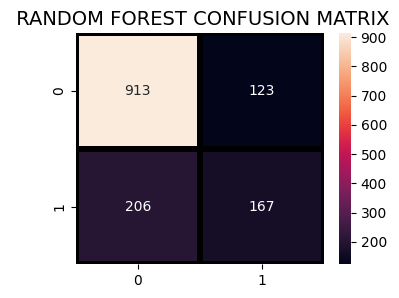

In [44]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

**Logistic Regression**

In [45]:
lr_model = LogisticRegression()
lr_model.fit(X_trainscaler,y_train)
accuracy_lr = lr_model.score(X_testscaler,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)
lr_pred= lr_model.predict(X_testscaler)
report = classification_report(y_test,lr_pred)
print(report)

Logistic Regression accuracy is : 0.7984386089425124
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



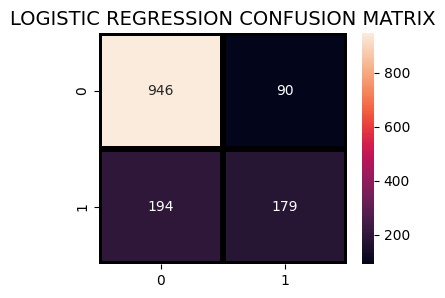

In [46]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

**Decision Tree Classifier**

In [47]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_trainscaler,y_train)
predictdt_y = dt_model.predict(X_testscaler)
accuracy_dt = dt_model.score(X_testscaler,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7345635202271115


In [48]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1036
           1       0.50      0.49      0.49       373

    accuracy                           0.73      1409
   macro avg       0.66      0.65      0.66      1409
weighted avg       0.73      0.73      0.73      1409



**Adaboost Classifier**

In [50]:
a_model = AdaBoostClassifier()
a_model.fit(X_trainscaler,y_train)
a_preds = a_model.predict(X_testscaler)
print("AdaBoost Classifier accuracy",accuracy_score(y_test, a_preds))


AdaBoost Classifier accuracy 0.7977288857345636


In [51]:
print(classification_report(y_test, a_preds))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.65      0.52      0.58       373

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



**Gradient Boosting Classifier**

In [52]:
gb = GradientBoostingClassifier()
gb.fit(X_trainscaler, y_train)
gb_pred = gb.predict(X_testscaler)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))
print(classification_report(y_test, gb_pred))

Gradient Boosting Classifier 0.8026969481902059
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.68      0.49      0.57       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



Gradient Boosting Classifier have more accuracy of 80% ,than other models for the dataset